In [1]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy as sp
import scipy.spatial.distance as dist
from scipy import stats
import seaborn as sns

from tesser import network
from tesser import tasks
from tesser import util
from tesser import sr
from tesser import fit
from tesser import rsa

In [2]:
data_dir = '/Users/athula/Dropbox/Experiments/tesser_successor/Data/'
subject = 112

In [3]:
#community structure
comm_strut = network.temp_node_info()
comm_strut

,node,comm,nodetype,connect
1,1,1,0,0
2,2,1,0,0
3,3,1,1,2
4,4,2,1,1
5,5,2,0,0
6,6,2,0,0
7,7,2,0,0
8,8,2,0,0
9,9,2,0,0
10,10,2,1,3


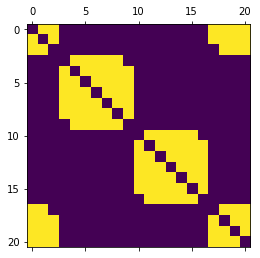

In [4]:
#community matrix
community_mat = network.community_mat(comm_strut)
plt.matshow(community_mat)

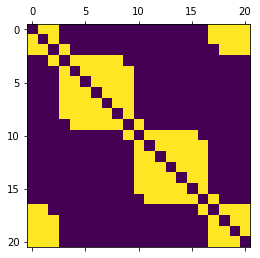

In [5]:
#adjacency matrix
adjacency_mat = network.adjacency_mat(comm_strut)
plt.matshow(adjacency_mat)

In [6]:
#what is this function in network() **?
network.path_length(adjacency_mat)

array([[0., 1., 1., 2., 3., 3., 3., 3., 3., 4., 4., 3., 3., 3., 3., 3.,
        2., 1., 1., 1., 1.],
       [1., 0., 1., 2., 3., 3., 3., 3., 3., 4., 4., 3., 3., 3., 3., 3.,
        2., 1., 1., 1., 1.],
       [1., 1., 0., 1., 2., 2., 2., 2., 2., 3., 4., 4., 4., 4., 4., 4.,
        3., 2., 1., 1., 1.],
       [2., 2., 1., 0., 1., 1., 1., 1., 1., 2., 3., 4., 4., 4., 4., 4.,
        4., 3., 2., 2., 2.],
       [3., 3., 2., 1., 0., 1., 1., 1., 1., 1., 2., 3., 3., 3., 3., 3.,
        4., 4., 3., 3., 3.],
       [3., 3., 2., 1., 1., 0., 1., 1., 1., 1., 2., 3., 3., 3., 3., 3.,
        4., 4., 3., 3., 3.],
       [3., 3., 2., 1., 1., 1., 0., 1., 1., 1., 2., 3., 3., 3., 3., 3.,
        4., 4., 3., 3., 3.],
       [3., 3., 2., 1., 1., 1., 1., 0., 1., 1., 2., 3., 3., 3., 3., 3.,
        4., 4., 3., 3., 3.],
       [3., 3., 2., 1., 1., 1., 1., 1., 0., 1., 2., 3., 3., 3., 3., 3.,
        4., 4., 3., 3., 3.],
       [4., 4., 3., 2., 1., 1., 1., 1., 1., 0., 1., 2., 2., 2., 2., 2.,
        3., 4., 4.,

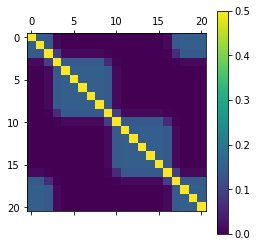

In [7]:
#what is this function in network() **?
network.plot_adjacency_matrix()

In [8]:
#structure learning df

# load structure learning for one subject
df_struct_subj = util.load_struct_df_all(data_dir, subject)
df_struct_subj

# load sturcutre learning for all subjects
df_struct_all = util.load_struct(data_dir)
df_struct_all 

,SubjNum,run,trial,objnum,file,orientnam,orientnum,resp,respnum,acc,rt,part,seqtype
0,100,1,1,10,object_2.jpg,cor,1.0,c,1.0,1.0,1.426618,1,NaN
1,100,1,2,5,object_30.jpg,cor,1.0,c,1.0,1.0,0.759233,1,NaN
2,100,1,3,4,object_12.jpg,cor,1.0,c,1.0,1.0,0.866177,1,NaN
3,100,1,4,3,object_7.jpg,cor,1.0,c,1.0,1.0,0.712731,1,NaN
4,100,1,5,1,object_6.jpg,cor,1.0,c,1.0,1.0,0.654236,1,NaN
5,100,1,6,3,object_7.jpg,rot,0.0,n,2.0,1.0,0.741313,1,NaN
6,100,1,7,20,object_16.jpg,cor,1.0,c,1.0,1.0,0.740017,1,NaN
7,100,1,8,1,object_6.jpg,cor,1.0,c,1.0,1.0,0.705186,1,NaN
8,100,1,9,3,object_7.jpg,cor,1.0,c,1.0,1.0,0.616942,1,NaN
9,100,1,10,20,object_16.jpg,cor,1.0,c,1.0,1.0,0.633175,1,NaN


In [9]:
#inductive generalization task

# load structure learning for one subject
df_induct_subj = util.load_induct_df_all(data_dir, subject)
df_induct_subj

# load sturcutre learning for all subjects
df_induct_all = util.load_induct(data_dir)
df_induct_all 

,SubjNum,TrialNum,QuestType,Environment,CueNum,CueObject,Opt1Num,Option1,Opt2Num,Option2,Resp,Acc,RT,cue,opt1,opt2,response
0,100,1,Prim,ocean,2,object_23.jpg,16,object_28.jpg,20,object_16.jpg,NaN,0,NaN,1,15,19,NaN
1,100,2,Bound2,desert,4,object_12.jpg,10,object_2.jpg,19,object_4.jpg,2.0,0,2.974157,3,9,18,1.0
2,100,3,Prim,desert,5,object_30.jpg,6,object_18.jpg,2,object_23.jpg,1.0,1,3.190848,4,5,1,0.0
3,100,4,Prim,ocean,2,object_23.jpg,9,object_35.jpg,19,object_4.jpg,2.0,1,3.373906,1,8,18,1.0
4,100,5,Prim,ocean,1,object_6.jpg,19,object_4.jpg,13,object_1.jpg,2.0,0,3.094699,0,18,12,1.0
5,100,6,Prim,forest,15,object_9.jpg,16,object_28.jpg,1,object_6.jpg,2.0,0,4.279663,14,15,0,1.0
6,100,7,Prim,desert,6,object_18.jpg,16,object_28.jpg,8,object_24.jpg,1.0,0,4.165558,5,15,7,0.0
7,100,8,Prim,ocean,19,object_4.jpg,21,object_25.jpg,15,object_9.jpg,1.0,1,3.013369,18,20,14,0.0
8,100,9,Prim,forest,12,object_36.jpg,2,object_23.jpg,13,object_1.jpg,2.0,1,2.371848,11,1,12,1.0
9,100,10,Bound2,forest,11,object_3.jpg,17,object_34.jpg,5,object_30.jpg,1.0,1,2.804257,10,16,4,0.0


In [10]:
#inductive generalization performance
induct_perf_subj = tasks.induct_avg(df_induct_subj)
induct_perf_all = tasks.induct_avg_all(data_dir)

induct_perf_subj
induct_perf_all

,participant,overall,prim,bound1,bound2
0,100,0.380952,0.333333,0.333333,0.666667
1,101,0.547619,0.533333,0.666667,0.500000
2,102,0.833333,0.866667,0.833333,0.666667
3,103,0.595238,0.600000,0.500000,0.666667
4,104,0.500000,0.500000,0.333333,0.666667
5,105,0.738095,0.666667,0.833333,1.000000
6,106,0.714286,0.733333,0.333333,1.000000
7,106,0.571429,0.533333,0.333333,1.000000
8,108,0.547619,0.566667,0.333333,0.666667
9,109,0.785714,0.833333,0.833333,0.500000


In [11]:
#low induct
low_induct_all = tasks.induct_avg_split_high(induct_perf_all)
low_induct_all

,participant,overall,prim,bound1,bound2
2,102,0.833333,0.866667,0.833333,0.666667
3,103,0.595238,0.600000,0.500000,0.666667
5,105,0.738095,0.666667,0.833333,1.000000
6,106,0.714286,0.733333,0.333333,1.000000
9,109,0.785714,0.833333,0.833333,0.500000
11,111,0.595238,0.633333,0.333333,0.666667
13,113,0.642857,0.633333,0.666667,0.666667
18,119,0.690476,0.666667,0.500000,1.000000
20,121,0.714286,0.700000,0.500000,1.000000
21,122,0.738095,0.700000,0.833333,0.833333


In [12]:
#high induct performers
high_induct_all = tasks.induct_avg_split_low(induct_perf_all)
high_induct_all

,participant,overall,prim,bound1,bound2
0,100,0.380952,0.333333,0.333333,0.666667
1,101,0.547619,0.533333,0.666667,0.500000
4,104,0.500000,0.500000,0.333333,0.666667
7,106,0.571429,0.533333,0.333333,1.000000
8,108,0.547619,0.566667,0.333333,0.666667
10,110,0.452381,0.333333,0.666667,0.833333
12,112,0.523810,0.533333,0.333333,0.666667
14,114,0.500000,0.466667,0.500000,0.666667
15,115,0.404762,0.466667,0.166667,0.333333
16,116,0.547619,0.566667,0.666667,0.333333


In [13]:
#inductive generalization performance
induct_bias_subj = tasks.induct_bias(df_induct_subj)
induct_bias_all = tasks.induct_bias_all(data_dir)

induct_bias_subj
induct_bias_all

,participant,overall,prim,bound1,bound2
0,100,-0.238095,-0.333333,-0.333333,0.333333
1,101,0.095238,0.066667,0.333333,0.000000
2,102,0.666667,0.733333,0.666667,0.333333
3,103,0.190476,0.200000,0.000000,0.333333
4,104,0.000000,0.000000,-0.333333,0.333333
5,105,0.476190,0.333333,0.666667,1.000000
6,106,0.428571,0.466667,-0.333333,1.000000
7,107,0.142857,0.066667,-0.333333,1.000000
8,108,0.095238,0.133333,-0.333333,0.333333
9,109,0.571429,0.666667,0.666667,0.000000


In [14]:
# parsing performance
df_parse_all = pd.read_csv(data_dir + 'tesserscan_parse_perf.csv')
df_parse_all

,subject,rand_corr_prop,rand_incorr_prop,ham_corr_prop,ham_incorr_prop,comm_prop,other_prop,diff_prop
0,100,0.426667,0.417476,0.345833,0.297917,0.386250,0.357696,0.028554
1,101,0.253521,0.087719,0.263889,0.159722,0.258705,0.123721,0.134984
2,102,0.115942,0.027451,0.744589,0.051587,0.430265,0.039519,0.390746
3,103,0.393939,0.436364,0.270833,0.388194,0.332386,0.412279,-0.079893
4,104,0.085714,0.145729,0.296296,0.098765,0.191005,0.122247,0.068758
5,105,0.152778,0.111111,0.152778,0.078704,0.152778,0.094907,0.057870
6,106,0.759494,0.713080,0.648148,0.564815,0.703821,0.638947,0.064873
7,106,0.439394,0.288372,0.312500,0.276389,0.375947,0.282380,0.093566
8,108,0.250000,0.070485,0.370370,0.074074,0.310185,0.072279,0.237906
9,109,0.364865,0.276316,0.237500,0.263889,0.301182,0.270102,0.031080


In [15]:
# grouping performance 

# grouping task output for one subject
array_group_subj = util.load_group(data_dir, subject)
array_group_subj

# grouping performance for all subjects **? not available -- needed?

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  4,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0, 11, 10,  8,  0,  0,  0,  0,  0, 21, 12,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  1,  6,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0, 17, 15, 20,  0,  0,  0,  0,  0,  0,  0, 14,  3, 13,
         0,  0,  0],
       [ 0,  0,  0, 16, 18,  0,  0,  0,  0,  0,  0,  0,  5, 19,  2,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

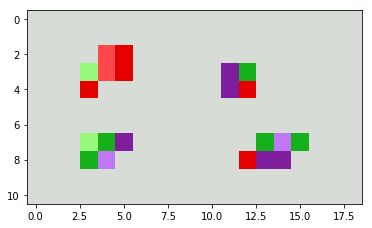

In [16]:
tasks.plot_dist(array_group_subj)

In [17]:
tasks.total_group_num(array_group_subj)

4

In [18]:
tasks.group_clusters(array_group_subj)

[[4, 9, 11, 10, 8, 7],
 [21, 12, 1, 6],
 [17, 15, 20, 16, 18],
 [14, 3, 13, 5, 19, 2]]

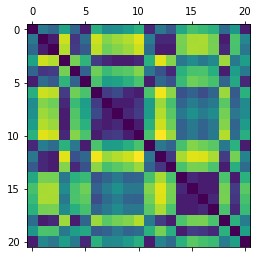

In [20]:
comp_dist_mat = tasks.euc_dist_mat(data_dir, subject)
plt.matshow(comp_dist_mat)

In [21]:
within, across = tasks.euc_dist_comm_avg(data_dir, subject)
within

6.100475118350482

In [22]:
overall_dist = tasks.euc_dist_comm_avg_all(data_dir)
overall_dist

,participant,within_dist,across_dist
0,100,6.389585,6.331571
1,101,3.237940,7.474054
2,102,1.890761,13.262016
3,103,5.854042,6.554370
4,104,5.999613,5.851717
5,105,5.419942,5.216478
6,106,5.020634,9.018935
7,107,6.759719,8.261046
8,108,3.562085,7.125414
9,109,5.820866,6.503169


/Users/athula/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/athula/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


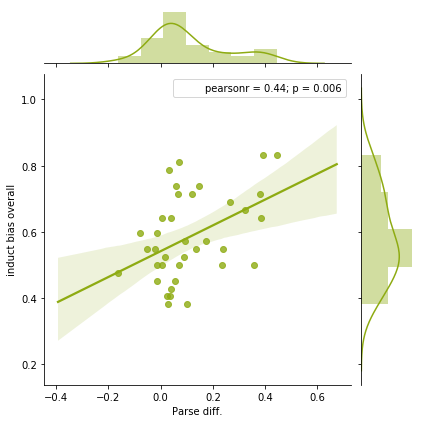

In [26]:
#inductive generalization x parsing
w = sns.jointplot(df_parse_all.diff_prop, induct_perf_all.overall, kind='reg', color=sns.xkcd_rgb["pea green"]);
w = w.annotate(stats.pearsonr)
plt.xlabel('Parse diff.')
plt.ylabel('induct bias overall')
plt.show()

/Users/athula/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


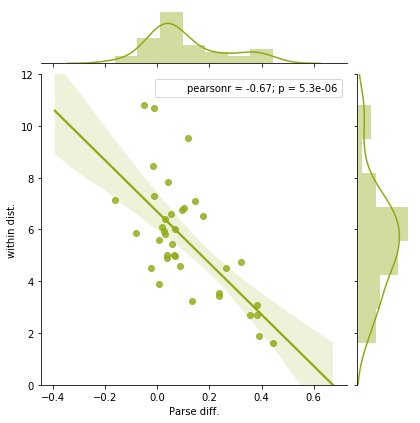

In [27]:
#grouping x parsing
w = sns.jointplot(df_parse_all.diff_prop, overall_dist.within_dist, kind='reg', color=sns.xkcd_rgb["pea green"]);
w = w.annotate(stats.pearsonr)
plt.xlabel('Parse diff.')
plt.ylabel('within dist.')
plt.ylim(-0, 12)
plt.show()

/Users/athula/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


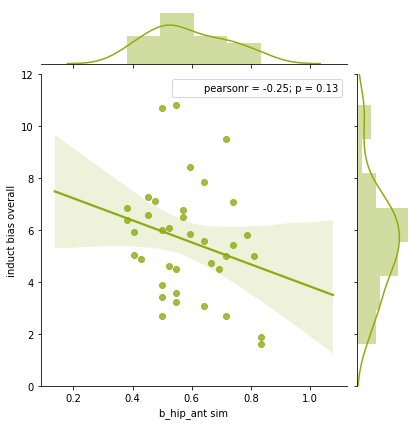

In [28]:
#grouping x inductive generalization
w = sns.jointplot(induct_perf_all.overall, overall_dist.within_dist, kind='reg', color=sns.xkcd_rgb["pea green"]);
w = w.annotate(stats.pearsonr)
plt.xlabel('b_hip_ant sim')
plt.ylabel('induct bias overall')
plt.ylim(-0, 12)
plt.show()
#w.savefig('tesserScan_Parse_by_Bias.pdf', transparent=True)

In [ ]:
#relating structure learning df to SR


In [ ]:
#relating structure learning df to adjacency 


In [ ]:
#relating structure learning df to communicability matrix
